In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from category_encoders import OneHotEncoder
from sklearn.metrics import f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [8]:
# read in data

train_values = pd.read_csv('Proj5_train_values.csv')
train_labels = pd.read_csv('Proj5_train_labels.csv')

In [9]:
# grab first 10% of rows
# referenced https://stackoverflow.com/questions/50173283/pandas-get-first-n-rows-based-on-percentage

train_values = train_values.head(int(len(train_values) * 0.1))
train_labels = train_labels.head(int(len(train_labels) * 0.1))

In [12]:
print(train_values.shape)
print(train_labels.shape)

(26060, 39)
(26060, 2)


In [16]:
pd.set_option('display.max_columns', None)
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


In [13]:
# check null values

train_values.isna().sum()

building_id                               0
geo_level_1_id                            0
geo_level_2_id                            0
geo_level_3_id                            0
count_floors_pre_eq                       0
age                                       0
area_percentage                           0
height_percentage                         0
land_surface_condition                    0
foundation_type                           0
roof_type                                 0
ground_floor_type                         0
other_floor_type                          0
position                                  0
plan_configuration                        0
has_superstructure_adobe_mud              0
has_superstructure_mud_mortar_stone       0
has_superstructure_stone_flag             0
has_superstructure_cement_mortar_stone    0
has_superstructure_mud_mortar_brick       0
has_superstructure_cement_mortar_brick    0
has_superstructure_timber                 0
has_superstructure_bamboo       

In [17]:
train_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26060 entries, 0 to 26059
Data columns (total 39 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   building_id                             26060 non-null  int64 
 1   geo_level_1_id                          26060 non-null  int64 
 2   geo_level_2_id                          26060 non-null  int64 
 3   geo_level_3_id                          26060 non-null  int64 
 4   count_floors_pre_eq                     26060 non-null  int64 
 5   age                                     26060 non-null  int64 
 6   area_percentage                         26060 non-null  int64 
 7   height_percentage                       26060 non-null  int64 
 8   land_surface_condition                  26060 non-null  object
 9   foundation_type                         26060 non-null  object
 10  roof_type                               26060 non-null  object
 11  gr

In [18]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


### EDA

In [22]:
earthquake = pd.merge(train_values, train_labels, right_index = True, left_index = True)
earthquake

,building_id_x,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,building_id_y,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,802906,3
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,28830,2
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,94947,3
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,590882,2
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,201944,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26055,15224,20,1161,1436,2,10,8,5,t,r,q,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,15224,2
26056,239671,10,1407,11907,3,65,6,7,t,r,n,f,q,s,d,1,1,1,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,239671,3
26057,977262,17,233,9990,3,25,8,7,t,r,q,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,977262,3
26058,906011,21,46,5919,2,10,8,5,t,r,n,f,q,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0,906011,2


<AxesSubplot:>

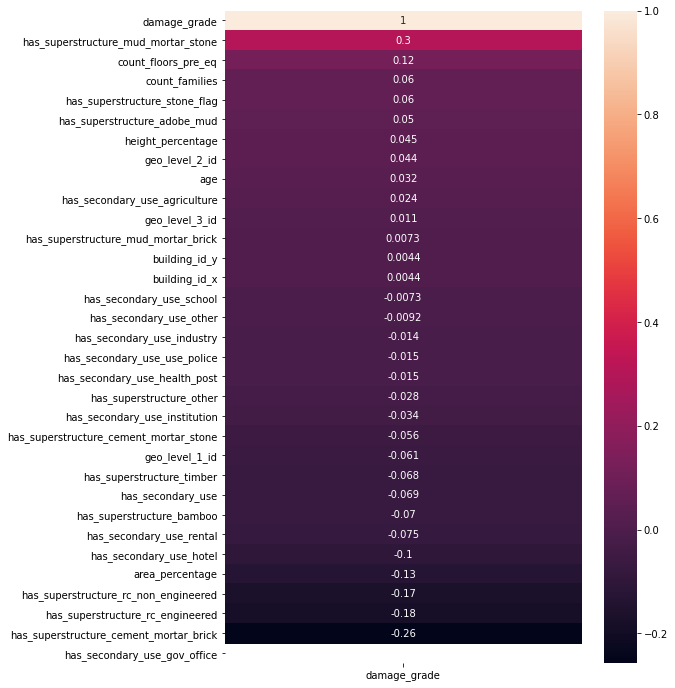

In [23]:
# see features mostly correlated with 'damage_grade'

plt.figure(figsize=(8,12))
sns.heatmap(earthquake.corr()[['damage_grade']].sort_values(by = 'damage_grade', ascending = False),annot=True )

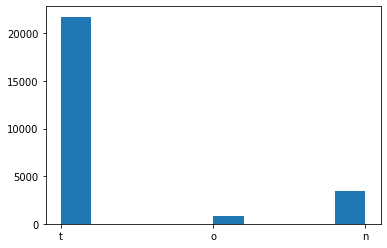

In [28]:
plt.hist(earthquake['land_surface_condition']);

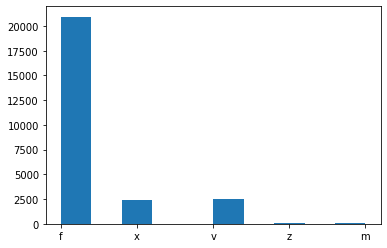

In [30]:
plt.hist(earthquake['ground_floor_type']);

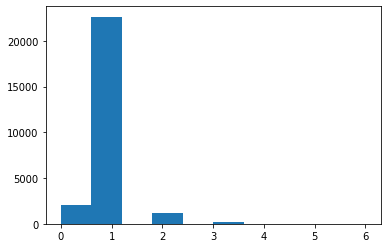

In [32]:
plt.hist(earthquake['count_families']);

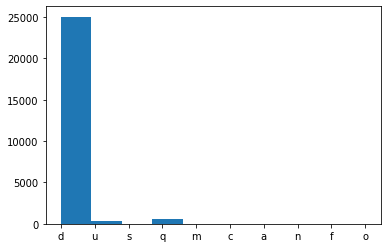

In [37]:
plt.hist(earthquake['plan_configuration']);

In [39]:
earthquake['position'].value_counts()

s    20222
t     4263
j     1348
o      227
Name: position, dtype: int64

### Feature Engineer

In [33]:
earthquake['secondary_use'] = earthquake['has_secondary_use_agriculture'] + earthquake['has_secondary_use_gov_office'] + earthquake['has_secondary_use_health_post'] + \
                              earthquake['has_secondary_use_hotel'] + earthquake['has_secondary_use_industry'] + earthquake['has_secondary_use_institution'] + \
                              earthquake['has_secondary_use_other'] + earthquake['has_secondary_use_rental'] + earthquake['has_secondary_use_school'] + earthquake['has_secondary_use_use_police']

In [35]:
earthquake['stone_structure'] = earthquake['has_superstructure_cement_mortar_stone'] + earthquake['has_superstructure_mud_mortar_stone'] + earthquake['has_superstructure_stone_flag']
earthquake['brick_structure'] = earthquake['has_superstructure_cement_mortar_brick'] + earthquake['has_superstructure_mud_mortar_brick']
earthquake['rc_structure'] = earthquake['has_superstructure_rc_engineered'] + earthquake['has_superstructure_rc_non_engineered']
earthquake['cement_mortar_structure'] = earthquake['has_superstructure_cement_mortar_brick'] + earthquake['has_superstructure_cement_mortar_stone']
earthquake['mud_mortar_structure'] = earthquake['has_superstructure_mud_mortar_brick'] + earthquake['has_superstructure_mud_mortar_stone'] + earthquake['has_superstructure_adobe_mud']

<AxesSubplot:>

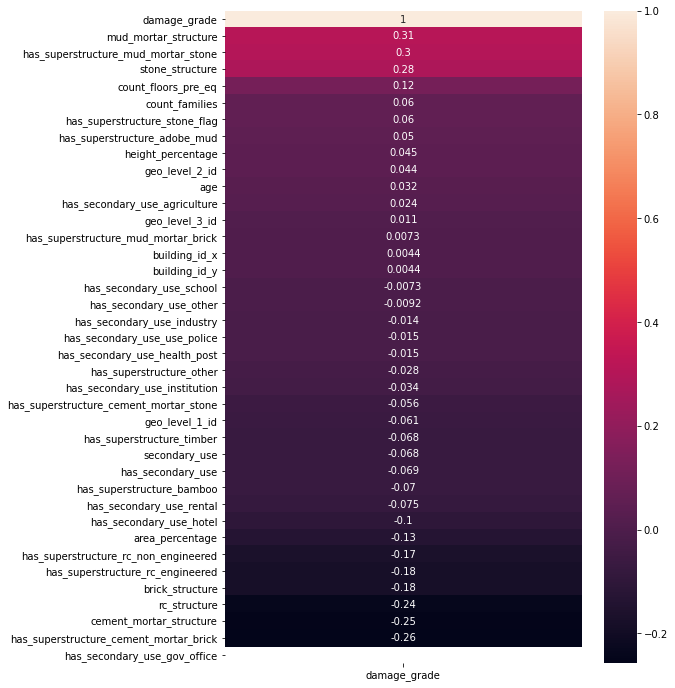

In [36]:
# see features mostly correlated with 'damage_grade' w/ engineered features

plt.figure(figsize=(8,12))
sns.heatmap(earthquake.corr()[['damage_grade']].sort_values(by = 'damage_grade', ascending = False),annot=True )

### Baseline Model

In [20]:
# baseline model

train_labels['damage_grade'].value_counts(normalize = True)

2    0.567421
3    0.336109
1    0.096470
Name: damage_grade, dtype: float64

In [40]:
# establish X + y

X = earthquake[['mud_mortar_structure', 'stone_structure', 'count_floors_pre_eq', 'count_families', 'age', 'foundation_type', 'ground_floor_type', 'position']]
y = earthquake['damage_grade']

In [47]:
# tts

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 123)

### Modeling

In [48]:
# Random Forest
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://git.generalassemb.ly/DSI-322/6.04_Forests_and_Features/blob/master/solution-code.ipynb
# https://git.generalassemb.ly/vleong1/Submissions/blob/master/Projects/project-2-master/4.%20Neighborhood%20Modeling.ipynb

pipe_forest = make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(), RandomForestClassifier(n_jobs = -1))

params = {'randomforestclassifier__max_depth' : [2, 3, 4, 5],
          'randomforestclassifier__min_samples_split' : [2, 3, 4]}

grid_forest = GridSearchCV(pipe_forest, param_grid = params)

grid_forest.fit(X_train, y_train)

print(f'Train Score: {grid_forest.score(X_train, y_train)}')
print(f'Test Score: {grid_forest.score(X_test, y_test)}')

grid_forest.best_params_

Train Score: 0.5794320798158097
Test Score: 0.577897160399079


{'randomforestclassifier__max_depth': 5,
 'randomforestclassifier__min_samples_split': 3}

In [55]:
# eval metrics
# https://git.generalassemb.ly/vleong1/Submissions/blob/master/Labs/6.01-lab-supervised-models-master/6.01-lab-supervised-models-master/6.01-lab-starter-code_VL.ipynb

forest_pred = grid_forest.predict(X_test)
print(f'Random Forest f1-score: {f1_score(y_test, forest_pred)}')
print(f'Random Forest precision score: {precision_score(y_test, forest_pred)}')
print(f'Random Forest recall score: {recall_score(y_test, forest_pred)}')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [54]:
# Extra Trees
# referenced https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

pipe_trees = make_pipeline(OneHotEncoder(use_cat_names = True), StandardScaler(), ExtraTreesClassifier(n_jobs = -1))

params = {'extratreesclassifier__max_depth' : [2, 3, 4, 5],
          'extratreesclassifier__min_samples_split' : [2, 3, 4]}

grid_trees = GridSearchCV(pipe_trees, param_grid = params)

grid_trees.fit(X_train, y_train)

print(f'Train Score: {grid_trees.score(X_train, y_train)}')
print(f'Test Score: {grid_trees.score(X_test, y_test)}')

grid_trees.best_params_

Train Score: 0.5755947812739831
Test Score: 0.5734458940905602


{'extratreesclassifier__max_depth': 3,
 'extratreesclassifier__min_samples_split': 3}

In [62]:
# eval metrics

trees_pred = grid_trees.predict(X_test)
print(f'Random Forest f1-score: {f1_score(y_test, trees_pred)}')
print(f'Random Forest precision score: {precision_score(y_test, trees_pred)}')
print(f'Random Forest recall score: {recall_score(y_test, trees_pred)}')

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [53]:
#pipe_trees.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'onehotencoder', 'standardscaler', 'extratreesclassifier', 'onehotencoder__cols', 'onehotencoder__drop_invariant', 'onehotencoder__handle_missing', 'onehotencoder__handle_unknown', 'onehotencoder__return_df', 'onehotencoder__use_cat_names', 'onehotencoder__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'extratreesclassifier__bootstrap', 'extratreesclassifier__ccp_alpha', 'extratreesclassifier__class_weight', 'extratreesclassifier__criterion', 'extratreesclassifier__max_depth', 'extratreesclassifier__max_features', 'extratreesclassifier__max_leaf_nodes', 'extratreesclassifier__max_samples', 'extratreesclassifier__min_impurity_decrease', 'extratreesclassifier__min_impurity_split', 'extratreesclassifier__min_samples_leaf', 'extratreesclassifier__min_samples_split', 'extratreesclassifier__min_weight_fraction_leaf', 'extratreesclassifier__n_estimators', 'extratreesclassifier__n_jobs', 'extratreesclassifier_